In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 显示中文(根据自己电脑设置)
plt.rcParams['font.sans-serif'] = ['SimHei']
# 显示负数
plt.rcParams['axes.unicode_minus'] = False


In [3]:
data = np.genfromtxt("homework/ch.3/watermelon3.txt", delimiter=' ', skip_header=True)

train_x, train_y = data[:, 1:-1], data[:, -1]
print(train_x[:5])


[[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]]


In [4]:
# 数据预处理
def pre_process(x, y):
    x -= np.mean(x, axis=0);
    x /= np.std(x, axis=0, ddof=1);
    x = np.c_[np.ones(len(x)), x];
    y = np.c_[y]
    print(x)
    return x, y


In [5]:
def model(x, theta):
    z = np.dot(x,theta)
    return 1/(1+np.exp(-z))


In [6]:
def cost_func(h, y):
    m = len(y)
    j = 1/m*(np.sum(-np.dot(y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h))))
    return j


In [7]:
# gradient descent
def gra_desc(x, y, alpha, iter_num): 
    m, n = x.shape
    theta = np.zeros((n, 1))
    j_history = np.zeros(iter_num)
    
    for i in range(iter_num):
        h = model(x, theta);
        j_history[i] = cost_func(h, y);
        delta_theta = 1.0/m*np.dot(x.T, h-y)
        theta -= alpha * delta_theta;
    return j_history, theta


In [8]:
alpha = 0.01
iter_num = 30000

train_x, train_y = pre_process(train_x, train_y)
j_history, theta = gra_desc(train_x, train_y, alpha, iter_num)
h = model(train_x, theta)

[[ 1.          0.98470574  2.06188803]
 [ 1.          1.44604425  1.36117977]
 [ 1.          0.60724695  0.42690209]
 [ 1.          0.45147031  0.8773574 ]
 [ 1.          0.13991703  0.01815561]
 [ 1.         -0.77676859  0.20167444]
 [ 1.         -0.30943867 -0.53240088]
 [ 1.         -0.57306068 -0.01521145]
 [ 1.          0.79897205 -1.01622325]
 [ 1.         -1.73539408  0.45192738]
 [ 1.         -1.72341126 -1.29984326]
 [ 1.         -1.13625315 -0.94948913]
 [ 1.          0.637204   -0.4322997 ]
 [ 1.          0.74504937 -0.1236544 ]
 [ 1.         -1.03439919  1.31112918]
 [ 1.          0.36159917 -1.42496973]
 [ 1.          1.11651674 -0.91612207]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


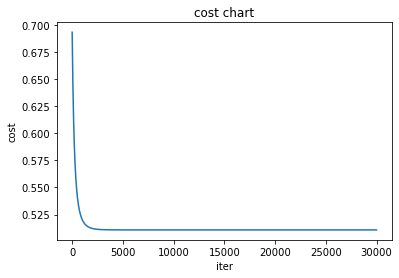

In [9]:
plt.title("cost chart")
plt.plot(range(iter_num), j_history);
plt.xlabel('iter')
plt.ylabel('cost')

plt.show()

In [10]:
def plot_descision_boundary(x, y, theta):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    
    x1 = np.arange(min(x[:,1 ]), max(x[:, 1]), 0.1)
    x2 = -(theta[1]*x1 + theta[0])
    plt.plot(x1, x2)
    
    plt.scatter(x[pos, 0], x[pos, 1], marker='o', c='b')
    plt.scatter(x[neg, 0], x[neg, 1], marker='x', c='r')
    plt.show()
    

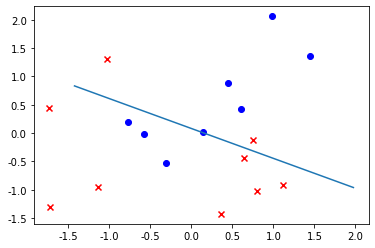

In [11]:
plot_descision_boundary(data[:, 1:-1], data[:, -1], theta)

# 易出错的地方

1. 第一列编号要剔除
2. 跑代码的时候有个地方出错了，修改之后，代码要重新跑，不然的话数据就被多次处理了